## Setup for TrajectoryNet

In [1]:
import scanpy
import pandas as pd
import magic
from sklearn import decomposition
import scprep
import numpy as np

In [2]:
stz = scanpy.read_h5ad('data/stz_beta_ins1_ins2.h5ad')
stz.obs['AT_committment'] = pd.concat((pd.read_csv('results/ctrl_at_comms.csv', index_col=0),
           pd.read_csv('results/treated_at_comms.csv', index_col=0))).loc[stz.obs_names]

In [4]:
stz = scanpy.read_h5ad('data/stz_beta_ins1_ins2.h5ad')
stz.obs['AT_committment_run_2'] = pd.concat((pd.read_csv('results/ctrl_at_comms_run_2.csv', index_col=0),
           pd.read_csv('results/treated_at_comms_run_2.csv', index_col=0))).loc[stz.obs_names]

In [20]:
magic_op = magic.MAGIC(random_state=42, t=20)
stz.layers['X_magic'] = magic_op.fit_transform(stz.to_df())

pc_op = decomposition.PCA(n_components=20, random_state=42)
data_pc = pc_op.fit_transform(stz.layers['X_magic'])
data_magic_pc_norm = data_pc / np.std(data_pc[:, 0])

Calculating MAGIC...
  Running MAGIC on 6760 cells and 18210 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/gpfs/gibbs/project/krishnaswamy_smita/av622/conda_envs/gspa/lib/python3.8/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 4.28 seconds.
    Calculating KNN search...
    Calculated KNN search in 4.69 seconds.
    Calculating affinities...
    Calculated affinities in 4.57 seconds.
  Calculated graph and diffusion operator in 13.68 seconds.
  Running MAGIC with `solver='exact'` on 18210-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 3.84 seconds.
Calculated MAGIC in 17.74 seconds.


<Axes3D: title={'center': 'Timepoints for TrajectoryNet'}>

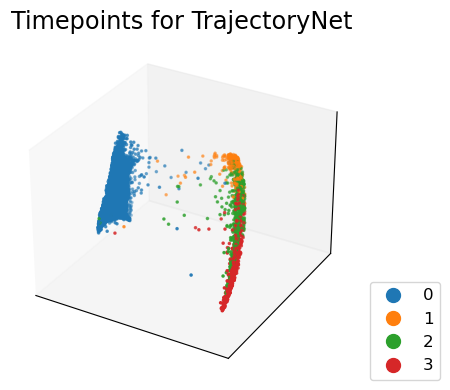

In [24]:
scprep.plot.scatter3d(data_magic_pc_norm, c=stz.obs['TrajectoryNet_timepoints'],
                      title='Timepoints for TrajectoryNet', legend_loc=(1.05,0), ticks=None, figsize=(7,4))

In [ ]:
np.savez('data/stz_4_tp_at_assignment.npz',
         pca=data_magic_pc_norm, sample_labels=timepoints)

<Axes3D: title={'center': 'Timepoints for TrajectoryNet'}>

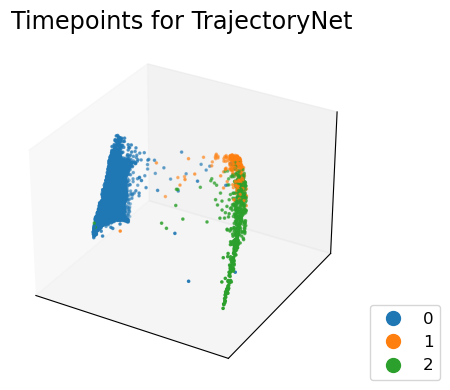

In [25]:
mask = timepoints != 3
scprep.plot.scatter3d(data_magic_pc_norm[mask], c=timepoints[mask],
                      title='Timepoints for TrajectoryNet', legend_loc=(1.05,0), ticks=None, figsize=(7,4))

In [17]:
np.savez('data/stz_4_tp_at_assignment_leave_out_4.npz',
         pca=data_magic_pc_norm[mask], sample_labels=timepoints[mask])

<Axes3DSubplot:title={'center':'Timepoints for TrajectoryNet'}>

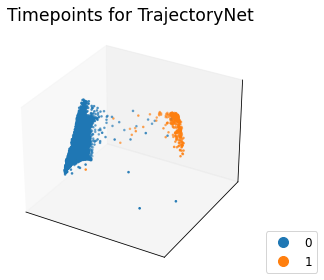

In [22]:
mask = (timepoints != 3) & (timepoints != 2)
scprep.plot.scatter3d(data_magic_pc_norm[mask], c=timepoints[mask],
                      title='Timepoints for TrajectoryNet', legend_loc=(1.05,0), ticks=None, figsize=(7,4))

In [24]:
np.savez('data/stz_4_tp_at_assignment_leave_out_34.npz',
         pca=data_magic_pc_norm[mask], sample_labels=timepoints[mask])

In [29]:
stz.obsm['data_magic_pc_norm'] = data_magic_pc_norm

In [5]:
stz.write('data/stz_beta_ins1_ins2.h5ad', compression='gzip')